In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
#### Uncomment to read-in the data

# # Reading in the data

url = "https://raw.githubusercontent.com/MachineLearningUniandes/MANTRA/master/data/lightcurves/transient_lightcurves.csv"
url1 = 'https://raw.githubusercontent.com/MachineLearningUniandes/MANTRA/master/data/lightcurves/transient_labels.csv'
transient_lc = pd.read_csv(url)
transient_labels = pd.read_csv(url1)

In [5]:
transient_labels.shape

(5539, 2)

# Plotting a pie chat/bar graph of the classes in the data

In [6]:
transient_labels.head()

,Classification,TransientID
0,Flare,1611101400424116462
1,HPM,1611101210274176502
2,HPM,1611101150154137989
3,HPM,1611091630244128695
4,CV,1611091600294129774


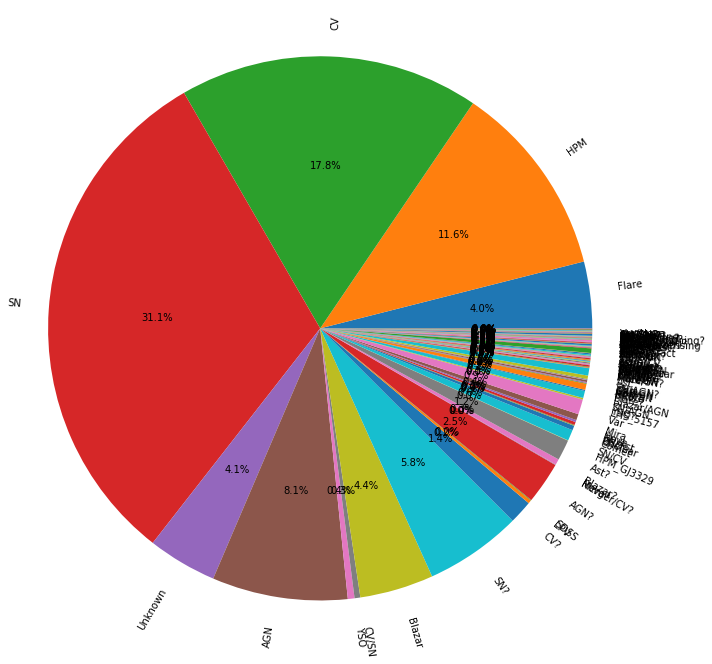

In [7]:
unique_labels=transient_labels.Classification.unique()
len_labels = []
for i in unique_labels:
    x = transient_labels[transient_labels['Classification']==i]
    len_labels.append(x)


label_len = []
for i in range(len(len_labels)):
    
    label_len.append(len(len_labels[i]))
    

    
plt.figure(figsize=(10,10))
plt.pie(label_len,labels=unique_labels,autopct='%1.1f%%', labeldistance=1.1,rotatelabels=True)
plt.axis('equal')
plt.tight_layout()
# plt.legend()
plt.show()

In [8]:
for i in range(len(unique_labels)):
    
    if unique_labels[i]=='Unknown':
        
        print('Number of unknown transients = {}'.format(label_len[i]))
        
len(unique_labels)

Number of unknown transients = 228


106

In [9]:
plt.pie?

# Getting Unique IDs from the data

In [10]:
transient_lc.shape

(440469, 5)

In [11]:
transient_lc.head()

,ID,observation_id,Mag,Magerr,MJD
0,TranID1409030010044114444,0,18.8765,0.166417,53766.089871
1,TranID1409030010044114444,1,20.0519,0.281733,53990.458866
2,TranID1409030010044114444,2,20.2199,0.295764,53996.286004
3,TranID1409030010044114444,3,21.1192,0.495390,54385.205789
4,TranID1409030010044114444,4,19.3289,0.195002,54355.282285


In [12]:
unique_ID=transient_lc.ID.unique()
len(unique_ID)

4869

In [13]:
# # Getting the Unique ID and storing them in a list

# unique_ID = []

# for k in range(1,len(transient_lc.ID)):

#     if transient_lc.ID.iloc[k-1] != transient_lc.ID.iloc[k]:

#         unique_ID.append(transient_lc.ID.iloc[k-1])

# # Appending the last data since the loop above goes
# # up to len(lc.ID)-1
# unique_ID.append(transient_lc.ID.iloc[-1])

In [14]:
Lc_len = [] # List to store the duration of the lc

d = []      # List to store data for a unique ID as
            # by the code above

    
#  Storing the datasets of the unique ID in a the 'd' 
#  list
for i in unique_ID:
    
    z = transient_lc[transient_lc['ID']==i]
    d.append(z)
    
    # calculating the duration of the lcs
    Lc_len.append(np.sort(z.MJD)[-1] - np.sort(z.MJD)[0])
    



# Ploting first 4 light curves of the unique IDs

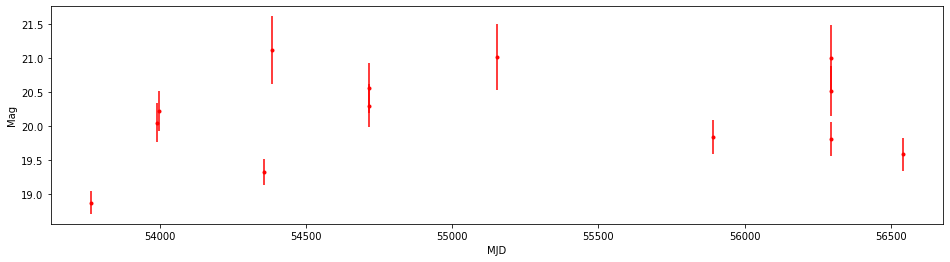

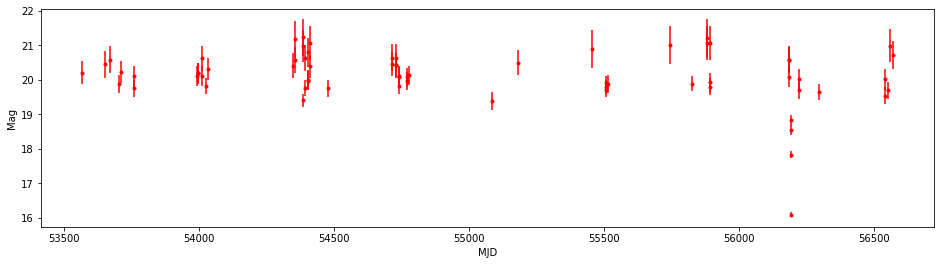

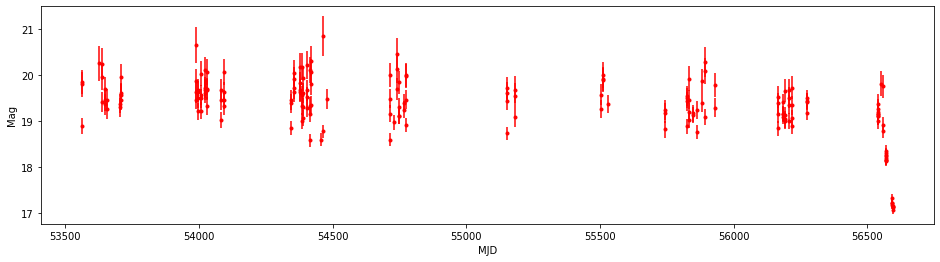

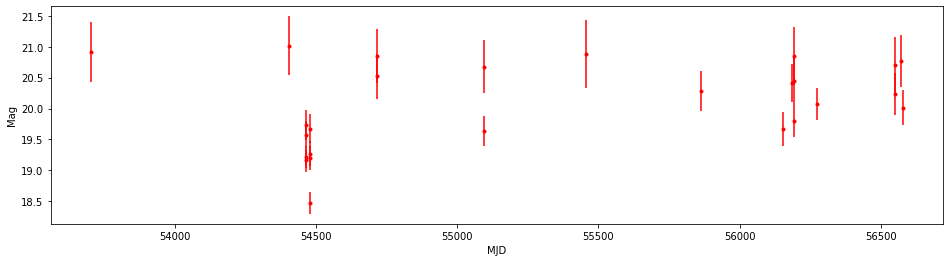

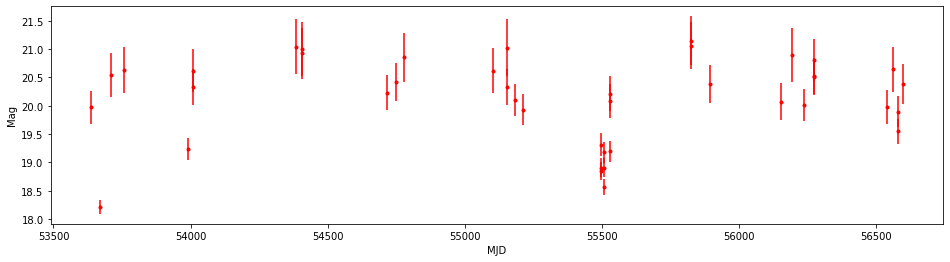

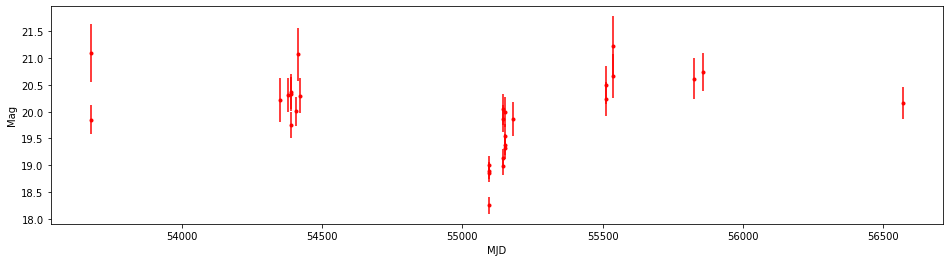

In [15]:
# Plotting light curves for the first 4 unique IDs as by the code above
random_lc = np.random.normal(0,len(unique_ID),5)
for i in range(0,6):
    plt.figure(figsize=(16,4))
    plt.errorbar(d[i].MJD,d[i].Mag,yerr=d[i].Magerr,
                 fmt='.r',color='r')

    plt.xlabel('MJD')
    plt.ylabel('Mag')
    plt.savefig('Light_Curve'+str(i)+'.png')
    plt.show()

# Plotting a histogram with the light curve durations

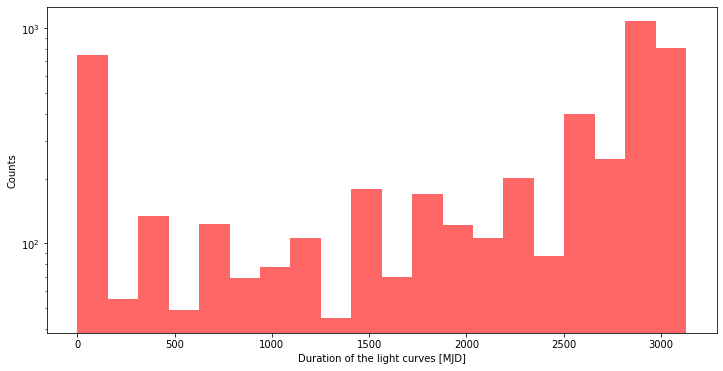

In [16]:
plt.figure(figsize=(12,6))
plt.hist(Lc_len,color='red',alpha=0.6, bins=20)
plt.xlabel('Duration of the light curves [MJD]')
plt.ylabel('Counts')
plt.yscale('log')
plt.savefig('lc_duration.png')
plt.show()


# Zero light curve length



* From the plot above we can see that several light curves (lc) have zero lengths


* The code below investigates this light curves in detail


* We have found that the light curves with zero lengths have a single point in their observations


* The paper does not say anything about this light curves

In [17]:
# Saving indeces where the light curve 
# length/duration is zero.

Zero_Lenth_lc = []
for i in range (len(Lc_len)):
    
    if Lc_len[i] == 0: 
        Zero_Lenth_lc.append(i)
        
# Checking the indices in obtained above
# in the original data

d[Zero_Lenth_lc[0]] 

print('Number of transients = {} according to the code above'.format(len(unique_ID) - len(Zero_Lenth_lc)))

Number of transients = 4693 according to the code above


In [18]:
# len(Zero_Lenth_lc)